In [80]:
import numpy as np
import matplotlib.pyplot as plt
import h5py, os
import scipy.integrate

In [2]:
from utils.data_reader import readH5_PLUTO

# Load Data

In [3]:
output_dir = "/home/yangelaxue/Documents/VUW/pluto_runs/Orszag_Tang/"

In [32]:
time_idxes = np.sort([int(f[5:9]) for f in os.listdir(output_dir) if (f.startswith('data') and f.endswith('.h5'))])
f_names = [f"data.{('000'+str(t_idx))[-4:]}.dbl.h5" for t_idx in time_idxes]

In [103]:
X, Y = readH5_PLUTO(os.path.join(output_dir,f_names[0]), 'X', 'Y')

vx1_t = np.array([readH5_PLUTO(os.path.join(output_dir,f_name), 'vx1')[0][300,300] for f_name in f_names])

In [104]:
dt = 0.1

t = np.linspace(0,10,int(10/dt+1))

In [105]:
# for vx1 in vx1_t:
#     plt.pcolormesh(vx1)
#     plt.gca().set_aspect(1)
#     plt.show()
    

In [112]:
Vx1 = 1/10 * scipy.integrate.simpson(vx1_t,x=t)

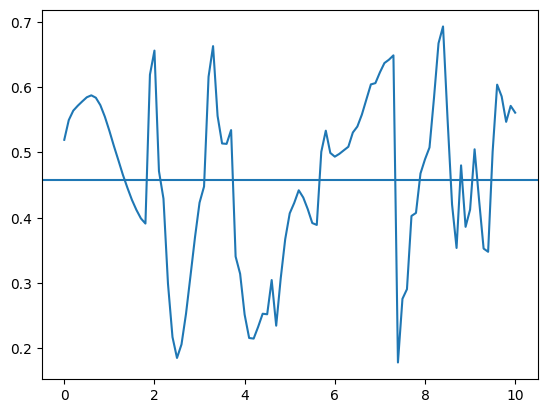

In [113]:
plt.plot(t,vx1_t)
plt.axhline(Vx1)

In [116]:
ux1_t = vx1_t-Vx1

Ux1 = 1/10 * scipy.integrate.simpson(ux1_t,x=t)

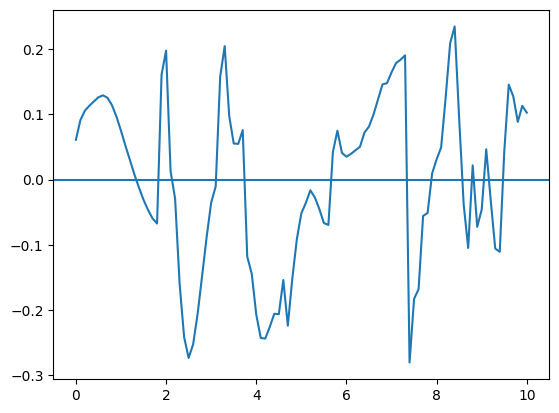

In [119]:
plt.plot(t,ux1_t)
plt.axhline(Ux1)

(array([ 6.,  7.,  6.,  6., 18.,  7., 19., 19.,  7.,  6.]),
 array([-0.28022846, -0.22873951, -0.17725056, -0.12576161, -0.07427266,
        -0.02278371,  0.02870524,  0.08019419,  0.13168314,  0.18317209,
         0.23466103]),
 <BarContainer object of 10 artists>)

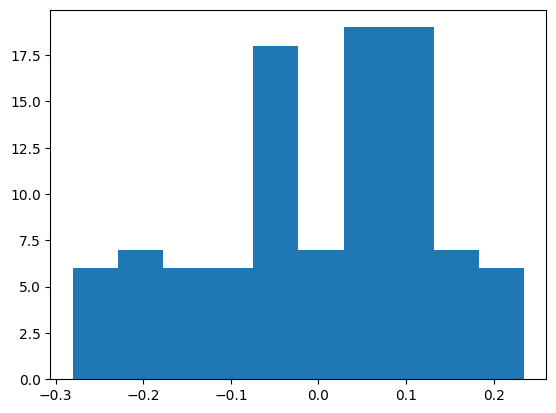

In [131]:
plt.hist(ux1_t, bins=10)

In [187]:
def get_B(n_bins):
    
    dux1 = (ux1_t.max()-ux1_t.min())/n_bins
    ux1_bins = np.arange(ux1_t.min(),ux1_t.max(),dux1)

    B = []

    for ux1_bin in ux1_bins:
        _ = (ux1_bin<=ux1_t)*(ux1_t<(ux1_bin+dux1))
        B.append(_.sum()*dt)
    
    B = np.array(B)/dux1/10
    print(np.sum(B*dux1))

    return B, ux1_bins

In [191]:
B, ux1_bins = get_B(20)

1.0


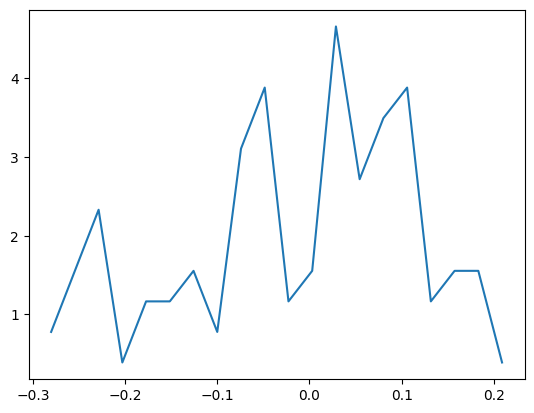

In [192]:
plt.plot(ux1_bins,B)

In [193]:
dk = 2*np.pi/(ux1_t.max()-ux1_t.min())
k = dk*20

In [ ]:
1/10 * scipy.integrate.simpson(ux1_t,x=t)